## Reading the data set 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('emp.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
y=df['Attrition']

## ANALYSIS of DATA

In [3]:
#conda install -c conda-forge pandas-profiling 
#import pandas_profiling
#df.profile_report(title="Data Report")

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## From the abocve we saw that the features 
##### Employee count,Over 18,Staqndard Hours these three are having constant values for all entries sow e are eliminating them from data
##### Employee Number is unique for every one and its has no effect on attrition so we remove it

In [5]:
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [6]:
#df.profile_report(title="Data Report")

# Variable Identification
from the above report we can see that 16-numerical <br> 13- caetgorical <br> 2 bool in which 1 is target variable
<br><h4>Let us see the weather they are identified correctly if no t we will type cast them</h4> 


In [7]:
for i in df.columns:
    print(i,"--------------->",df[i].dtype)

Age ---------------> int64
Attrition ---------------> object
BusinessTravel ---------------> object
DailyRate ---------------> int64
Department ---------------> object
DistanceFromHome ---------------> int64
Education ---------------> int64
EducationField ---------------> object
EnvironmentSatisfaction ---------------> int64
Gender ---------------> object
HourlyRate ---------------> int64
JobInvolvement ---------------> int64
JobLevel ---------------> int64
JobRole ---------------> object
JobSatisfaction ---------------> int64
MaritalStatus ---------------> object
MonthlyIncome ---------------> int64
MonthlyRate ---------------> int64
NumCompaniesWorked ---------------> int64
OverTime ---------------> object
PercentSalaryHike ---------------> int64
PerformanceRating ---------------> int64
RelationshipSatisfaction ---------------> int64
StockOptionLevel ---------------> int64
TotalWorkingYears ---------------> int64
TrainingTimesLastYear ---------------> int64
WorkLifeBalance ----------

<br><h3>We will take the columns with string values as another df</h3>

In [8]:
catdf = df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']]
catdf.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


#### we will remove Attrition culumns for some time because it is the resultant variable

In [9]:
catdf = catdf.drop(['Attrition'],axis=1)
catdf.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


### we will do onehot coding to them to be available for numerical calculations since some models will not work on strings and it is not ordinal data

In [10]:
cat_vars=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for var in cat_vars:
    cat_list=pd.get_dummies(df[var],prefix=var)
    df=df.join(cat_list)

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,0,0,1,0,0,0,1,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,0,0,1,0,0,0,1,0,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,0,0,0,0,0,0,1,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,0,1,0,0,0,1,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,0,0,0,0,0,0,1,0,1,0


### now we will remove string columns from the df

In [12]:
df.drop(columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1,inplace=True)
hr=df
hr.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,1,0


In [13]:
for i in hr.columns:
    print(i,"--------------->",hr[i].dtype)

Age ---------------> int64
DailyRate ---------------> int64
DistanceFromHome ---------------> int64
Education ---------------> int64
EnvironmentSatisfaction ---------------> int64
HourlyRate ---------------> int64
JobInvolvement ---------------> int64
JobLevel ---------------> int64
JobSatisfaction ---------------> int64
MonthlyIncome ---------------> int64
MonthlyRate ---------------> int64
NumCompaniesWorked ---------------> int64
PercentSalaryHike ---------------> int64
PerformanceRating ---------------> int64
RelationshipSatisfaction ---------------> int64
StockOptionLevel ---------------> int64
TotalWorkingYears ---------------> int64
TrainingTimesLastYear ---------------> int64
WorkLifeBalance ---------------> int64
YearsAtCompany ---------------> int64
YearsInCurrentRole ---------------> int64
YearsSinceLastPromotion ---------------> int64
YearsWithCurrManager ---------------> int64
BusinessTravel_Non-Travel ---------------> uint8
BusinessTravel_Travel_Frequently ---------------

In [14]:
hr.shape

(1470, 51)

#### now we observe that we are not having any object data's 
#### Now we will take all numerical type values a side

In [15]:
#hr.profile_report(title="Data Report")

### from above we will take only the Contineous Numerical variables 

In [16]:
nhr = hr[['Age','DailyRate','DistanceFromHome','Education','HourlyRate','JobLevel','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
nhr.head()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,94,2,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,1,61,2,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,2,92,1,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,4,56,1,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,1,40,1,3468,16632,9,12,6,3,2,2,2,2


In [17]:
nhr.shape

(1470, 16)

## now we will scale the data 

In [18]:
from sklearn.preprocessing import scale
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
nhrcol= nhr.columns
nhr = pd.DataFrame(min_max_scaler.fit_transform(nhr))
nhr.columns = nhrcol
nhr.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.450567,0.501421,0.292590,0.478231,0.512731,0.265986,0.289307,0.490629,0.299244,0.300680,0.28199,0.466553,0.175204,0.234958,0.145850,0.242537
std,0.217509,0.288840,0.289531,0.256041,0.290420,0.276735,0.247918,0.285797,0.277557,0.261424,0.19452,0.214878,0.153163,0.201285,0.214829,0.209890
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.259843,0.035714,0.250000,0.257143,0.000000,0.100158,0.239028,0.111111,0.071429,0.15000,0.333333,0.075000,0.111111,0.000000,0.117647
50%,0.428571,0.501074,0.214286,0.500000,0.514286,0.250000,0.205898,0.487513,0.222222,0.214286,0.25000,0.500000,0.125000,0.166667,0.066667,0.176471
75%,0.595238,0.755190,0.464286,0.750000,0.767857,0.500000,0.388099,0.737503,0.444444,0.500000,0.37500,0.500000,0.225000,0.388889,0.200000,0.411765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### now we will see the distribution of Data 

In [19]:
from scipy.stats import skew
import matplotlib.pyplot as plt

Age 0.4128644615478511


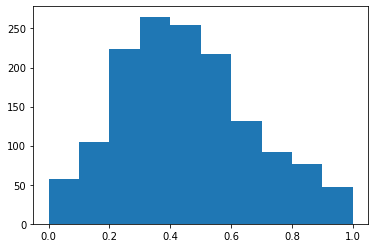

DailyRate -0.0035149769582912345


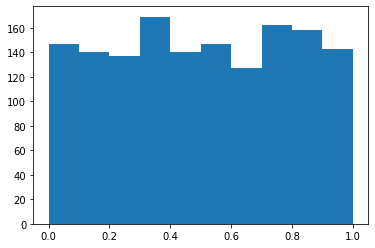

DistanceFromHome 0.9571400469829039


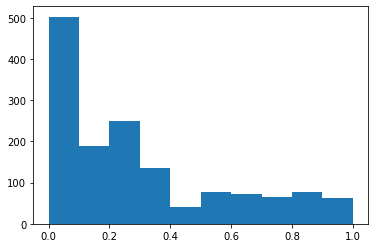

Education -0.2893854052028825


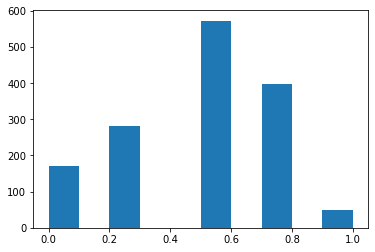

HourlyRate -0.03227797319055447


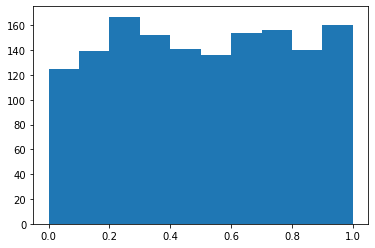

JobLevel 1.0243546583925869


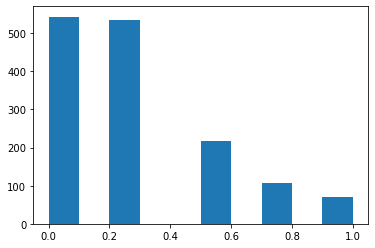

MonthlyIncome 1.368418512333082


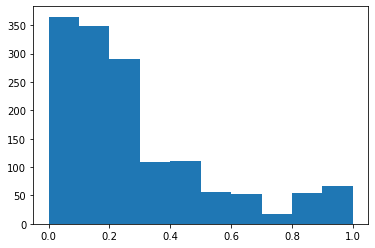

MonthlyRate 0.018558845568460405


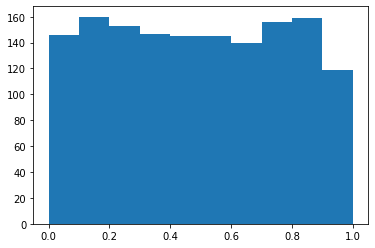

NumCompaniesWorked 1.0254233954371297


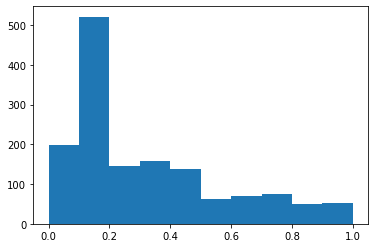

PercentSalaryHike 0.8202898522796266


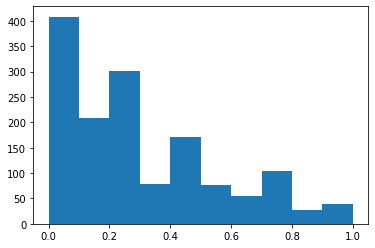

TotalWorkingYears 1.11603155825941


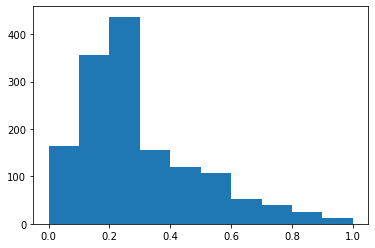

TrainingTimesLastYear 0.5525595985771932


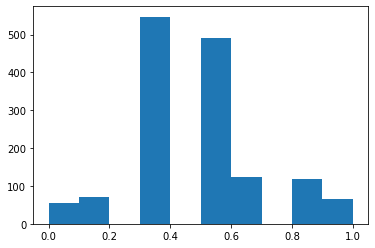

YearsAtCompany 1.7627284034822988


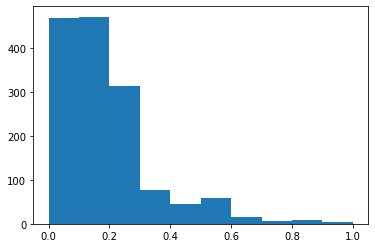

YearsInCurrentRole 0.9164268059808769


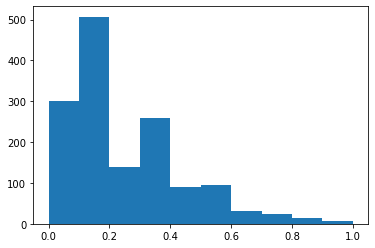

YearsSinceLastPromotion 1.9822646234628942


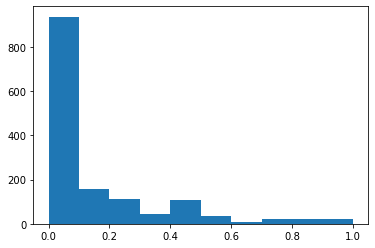

YearsWithCurrManager 0.8326002906209381


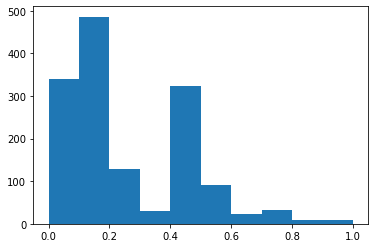

In [20]:
for i in nhr.columns:
    plt.hist(nhr[i])
    print(i,skew(nhr[i]))
    plt.show()

### from above we observed that the variables Dailyrate,HourlyRate and Monthly Rate are uniformly distributed so we can remove these variables

In [21]:
nhr.drop(['DailyRate','HourlyRate','MonthlyRate'],axis=1,inplace = True)
hr.drop(['DailyRate','HourlyRate','MonthlyRate'],axis=1,inplace = True)

In [22]:
nhr.shape

(1470, 13)

In [23]:
hr.drop(nhr.columns,axis=1,inplace=True)

In [24]:
hr = hr.join(nhr)

## Now our full data is converted into Numerical Form 

In [25]:
hrcols =list(hr.columns)
hrcols

['EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes',
 'Age',
 'DistanceFromHome',
 'Education',
 

In [26]:
hr.shape

(1470, 48)

# pca

In [27]:
npca = hr[nhr.columns]
npca.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.000000,0.25,0.25,0.262454,0.888889,0.000000,0.200,0.0,0.15,0.222222,0.000000,0.294118
1,0.738095,0.250000,0.00,0.25,0.217009,0.111111,0.857143,0.250,0.5,0.25,0.388889,0.066667,0.411765
2,0.452381,0.035714,0.25,0.00,0.056925,0.666667,0.285714,0.175,0.5,0.00,0.000000,0.000000,0.000000
3,0.357143,0.071429,0.75,0.00,0.100053,0.111111,0.000000,0.200,0.5,0.20,0.388889,0.200000,0.000000
4,0.214286,0.035714,0.00,0.00,0.129489,1.000000,0.071429,0.150,0.5,0.05,0.111111,0.133333,0.117647


In [28]:
from sklearn.decomposition import PCA
npca.shape

(1470, 13)

In [29]:
pca=PCA(n_components=13)
pca.fit(npca)
var1=np.cumsum(pca.explained_variance_ratio_)*100
var1

array([ 31.51160882,  45.10839722,  56.86614763,  66.30600138,
        75.2075295 ,  82.56779817,  88.89630377,  92.87309077,
        96.22304125,  97.88298146,  98.95452676,  99.53852271,
       100.        ])

In [30]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
#'weight' : 'bold',

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


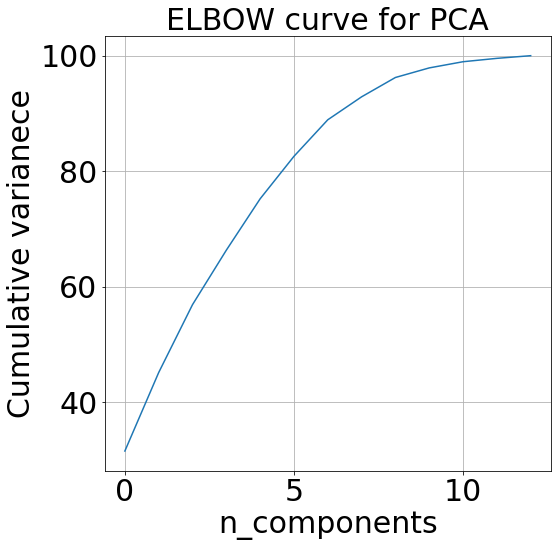

In [31]:

plt.figure(figsize=(8,8))
plt.plot(var1)
plt.title("ELBOW curve for PCA", fontsize=30)
plt.xlabel("n_components", fontsize=30)
plt.ylabel("Cumulative varianece", fontsize=30)
plt.grid()

plt.show()

In [32]:
# from garph curve turned at n_componnts=8
pca=PCA(n_components=8)
pca.fit(npca)
projected=pca.fit_transform(npca)
newnpca=pd.DataFrame(projected)
newnpca.columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8']
newnpca.head()


,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-0.000670,0.503800,-0.264021,-0.216372,0.177491,0.496600,-0.371331,0.008085
1,0.029370,-0.292749,-0.020902,0.607529,0.278690,0.137078,0.045359,0.357343
2,-0.476158,0.433242,-0.214480,0.045278,0.170804,0.224820,0.082000,0.073158
3,-0.277094,-0.087008,-0.253753,-0.296422,-0.340202,-0.080825,0.001690,0.031727
4,-0.398870,0.454283,-0.282514,-0.143229,0.362281,0.626243,0.144097,-0.204651


In [33]:
hr.drop(nhr.columns,axis=1,inplace=True)


In [34]:
hr=hr.join(newnpca)
hr.shape

(1470, 43)

# Feature Selection

# mutual index 

In [35]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2

In [36]:
X = hr.drop(newnpca.columns,axis=1)

In [37]:
X.shape

(1470, 35)

In [38]:
mutuall = list()
col_values = list(X.columns.values)
feature_scores = mutual_info_classif(X,y)
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:15]:#Displays top 15
    print(fname, score)
    mutuall.append(fname)
mutuall

OverTime_No 0.03045899766739879
OverTime_Yes 0.018672041140401774
JobRole_Manufacturing Director 0.015967266602330277
BusinessTravel_Travel_Rarely 0.014099582303150893
Department_Research & Development 0.013886052624552336
JobRole_Human Resources 0.013472744990838281
EducationField_Human Resources 0.013118656622023162
JobRole_Sales Executive 0.0123269969882287
PerformanceRating 0.01177550694636964
JobRole_Manager 0.011080282358428617
JobSatisfaction 0.00993959863843652
StockOptionLevel 0.009598845479537266
JobRole_Laboratory Technician 0.008859750882450612
JobRole_Research Director 0.008510560594028771
MaritalStatus_Single 0.008281161819631011


['OverTime_No',
 'OverTime_Yes',
 'JobRole_Manufacturing Director',
 'BusinessTravel_Travel_Rarely',
 'Department_Research & Development',
 'JobRole_Human Resources',
 'EducationField_Human Resources',
 'JobRole_Sales Executive',
 'PerformanceRating',
 'JobRole_Manager',
 'JobSatisfaction',
 'StockOptionLevel',
 'JobRole_Laboratory Technician',
 'JobRole_Research Director',
 'MaritalStatus_Single']

# chi2

In [39]:
from scipy.stats import chi2_contingency


## Converting uncorrelated features into 

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

15 selected features


In [41]:
chi_feature

['EnvironmentSatisfaction',
 'JobSatisfaction',
 'StockOptionLevel',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'JobRole_Healthcare Representative',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes']

# Rcursive selector

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 35 features.


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 25 features.


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15 selected features


In [43]:
rfe_feature

['JobInvolvement',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'EducationField_Human Resources',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Sales Representative',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes']

# Tree selector

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=15)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [45]:
embeded_rf_feature

['EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'JobRole_Laboratory Technician',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes']

In [46]:
#chi_feature,rfe_feature,embeded_rf_feature

In [47]:
ft = set()
ft.update(chi_feature)
ft.update(rfe_feature)
ft.update(embeded_rf_feature)
ft.update(mutuall)

In [48]:
len(ft)

25

## final selected features

In [49]:
feat=list(ft)

In [50]:
finaldat = hr[ft]
finaldat = finaldat.join(newnpca)
finaldat.shape

(1470, 33)

In [51]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
attr = lb_make.fit_transform(y)
finaldat['attr'] = pd.DataFrame(attr)
attr=finaldat['attr']

In [52]:

finaldat.head()

,JobRole_Sales Representative,EnvironmentSatisfaction,OverTime_Yes,BusinessTravel_Travel_Rarely,BusinessTravel_Non-Travel,WorkLifeBalance,JobInvolvement,PerformanceRating,JobRole_Laboratory Technician,MaritalStatus_Single,...,EducationField_Technical Degree,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,attr
0,0,2,1,1,0,1,3,3,0,1,...,0,-0.000670,0.503800,-0.264021,-0.216372,0.177491,0.496600,-0.371331,0.008085,1
1,0,3,0,0,0,3,2,4,0,0,...,0,0.029370,-0.292749,-0.020902,0.607529,0.278690,0.137078,0.045359,0.357343,0
2,0,4,1,1,0,3,2,3,1,1,...,0,-0.476158,0.433242,-0.214480,0.045278,0.170804,0.224820,0.082000,0.073158,1
3,0,4,1,0,0,3,3,3,0,0,...,0,-0.277094,-0.087008,-0.253753,-0.296422,-0.340202,-0.080825,0.001690,0.031727,0
4,0,1,0,1,0,3,3,3,1,0,...,0,-0.398870,0.454283,-0.282514,-0.143229,0.362281,0.626243,0.144097,-0.204651,0


In [53]:
X = finaldat.iloc[:,finaldat.columns!='attr']
y=finaldat.attr

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,attr,random_state=9,test_size=0.25,stratify=attr)

In [55]:
(y_train.value_counts()/len(y_train))*100

0    83.84755
1    16.15245
Name: attr, dtype: float64

In [56]:
(y_test.value_counts()/len(y_test))*100

0    83.967391
1    16.032609
Name: attr, dtype: float64

## from above two rows we understood that the training and testing are having equal proportions of classes so by this we can prevent bias 

#  Decission Tree 

In [57]:
from sklearn import tree

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, attr, test_size=0.25,random_state=9)

In [59]:

import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 30}) 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


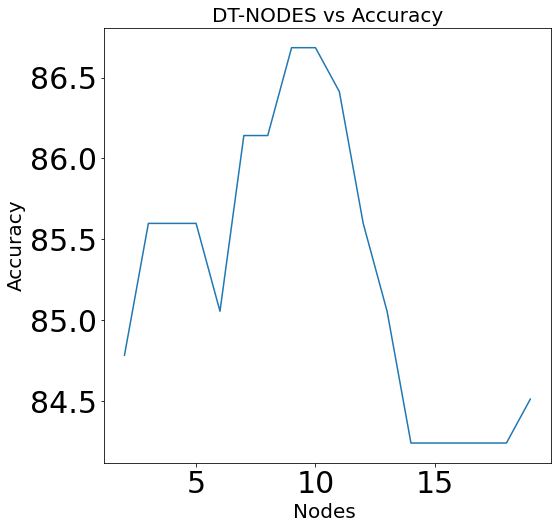

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, attr, test_size=0.25)
gx = []
gy = []
for i in range (2,20):
    gx.append(i)
    dtree = tree.DecisionTreeClassifier(max_leaf_nodes=i,random_state=9)
    dtree.fit(X_train,y_train)
    gy.append(100*dtree.score(X_test,y_test))
plt.figure(figsize=(8,8))
plt.plot(gx,gy)
plt.title("DT-NODES vs Accuracy",fontsize=20)
plt.xlabel("Nodes ",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.show()


In [61]:
from sklearn.metrics import classification_report

In [62]:
#X_train,X_test,y_train,y_test=train_test_split(X,attr,test_size=0.25,stratify=attr)
dtree = tree.DecisionTreeClassifier(max_leaf_nodes=8,random_state=9)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=8, random_state=9)

In [63]:
y_pred = dtree.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       312
           1       0.67      0.18      0.28        56

    accuracy                           0.86       368
   macro avg       0.77      0.58      0.60       368
weighted avg       0.84      0.86      0.83       368



In [65]:
t=classification_report(y_test, y_pred)

In [66]:
dtmet =pd.DataFrame({"model":('DTree'),"pre":[0.82],"rec":[0.85],"f1":[0.82],"acc":0.85})

In [67]:
dtmet

,model,pre,rec,f1,acc
0,DTree,0.82,0.85,0.82,0.85


In [68]:
from yellowbrick.classifier import ROCAUC

C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


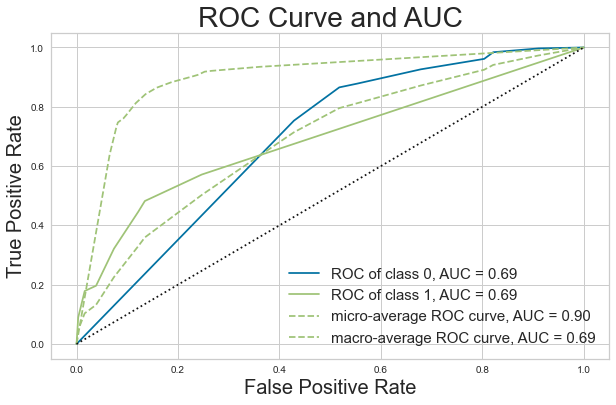

In [69]:

plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(dtree)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)

plt.legend(fontsize=15)


### Random Forest

In [70]:
#https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
from sklearn.model_selection import GridSearchCV

Text(0, 0.5, 'Accuracy')

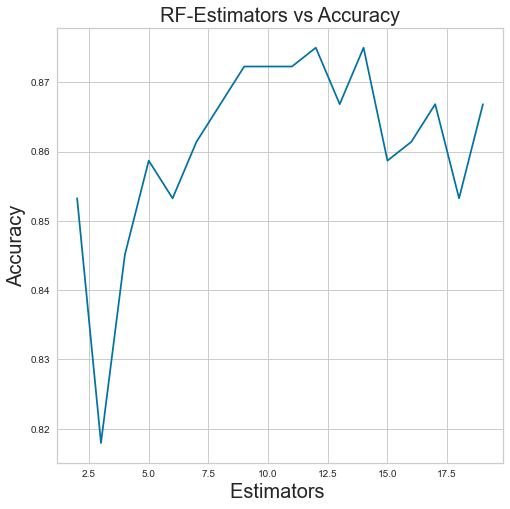

In [73]:
gx = []
gy = []
for i in range(2,20):
    gx.append(i)
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(X_train,y_train)
    clf.predict(X_test)
    gy.append(clf.score(X_test,y_test))
plt.figure(figsize=(8,8))    
plt.plot(gx,gy)
plt.title("RF-Estimators vs Accuracy",fontsize=20)
plt.xlabel("Estimators ",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

Text(0, 0.5, 'Accuracy')

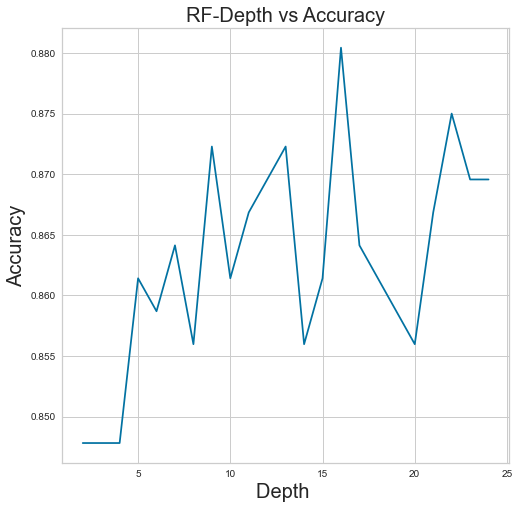

In [74]:
gx = []
gy = []
for i in range(2,25):
    gx.append(i)
    clf = RandomForestClassifier(n_estimators=30,max_depth=i)
    clf = clf.fit(X_train,y_train)
    clf.predict(X_test)
    gy.append(clf.score(X_test,y_test))
plt.figure(figsize=(8,8))  

plt.plot(gx,gy)
plt.title("RF-Depth vs Accuracy",fontsize=20)
plt.xlabel("Depth ",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)


In [75]:
rclf = RandomForestClassifier()

In [76]:
rclf = RandomForestClassifier(max_depth=15,
                       n_estimators=15)


In [77]:
rclf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=15)

In [78]:
pred = rclf.predict(X_test)

In [79]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       319
           1       0.83      0.31      0.45        49

    accuracy                           0.90       368
   macro avg       0.87      0.65      0.70       368
weighted avg       0.89      0.90      0.88       368



In [80]:
rf =pd.DataFrame({"model":('RF'),"pre":[0.83],"rec":[0.86],"f1":[0.83],"acc":0.86})

In [81]:
rf

,model,pre,rec,f1,acc
0,RF,0.83,0.86,0.83,0.86


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


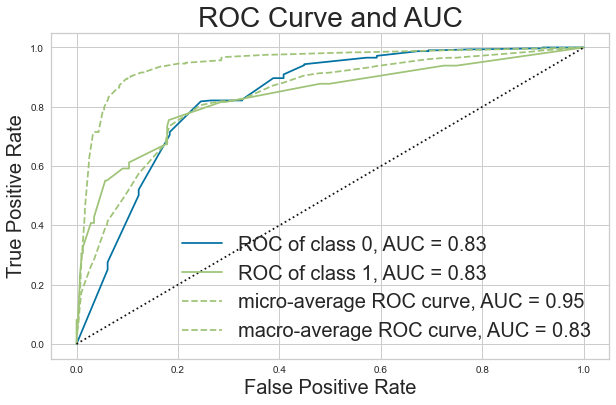

In [82]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(rclf)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)
plt.legend(fontsize=20)


# KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Accuracy')

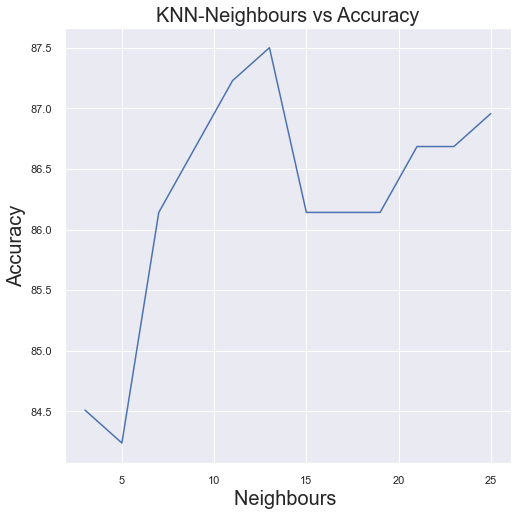

In [179]:
gx = []
gy = []
i=3
while i <= 25:
    gx.append(i)
    knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    gy.append(100*knn.score(X_test,y_test))
    i=i+2
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("KNN-Neighbours vs Accuracy",fontsize=20)
plt.xlabel("Neighbours ",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)


In [85]:
clf=KNeighborsClassifier(n_jobs=-1, n_neighbors=25, weights='distance')

In [86]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [87]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       319
           1       1.00      0.08      0.15        49

    accuracy                           0.88       368
   macro avg       0.94      0.54      0.54       368
weighted avg       0.89      0.88      0.83       368



In [88]:
kn =pd.DataFrame({"model":('KNN'),"pre":[0.88],"rec":[0.86],"f1":[0.80],"acc":0.86})

C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


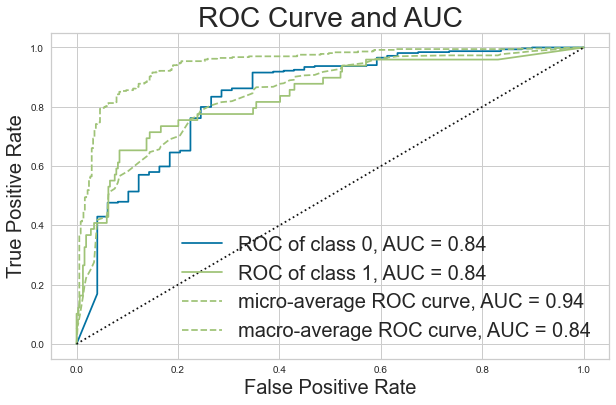

In [89]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(clf)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)
plt.legend(fontsize=20)


# NN

In [140]:
from sklearn.neural_network import MLPClassifier

In [141]:
clfn = MLPClassifier( hidden_layer_sizes=(100, 50,25))

In [142]:
clfn.fit(X_train,y_train)
pred = clfn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       308
           1       0.49      0.43      0.46        60

    accuracy                           0.83       368
   macro avg       0.69      0.67      0.68       368
weighted avg       0.83      0.83      0.83       368



C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [143]:
nn =pd.DataFrame({"model":('NN'),"pre":[0.83],"rec":[0.85],"f1":[0.84],"acc":0.85})

In [144]:
nn

,model,pre,rec,f1,acc
0,NN,0.83,0.85,0.84,0.85


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


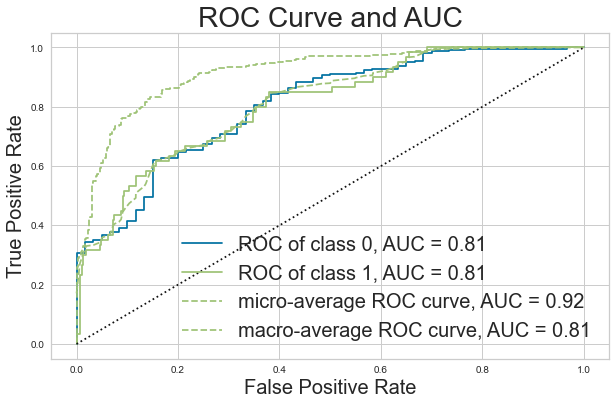

In [145]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(clfn)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)

plt.legend(fontsize=20)

# XGB

In [81]:
from xgboost import XGBClassifier

In [82]:
#!pip install xgboost

In [83]:
clf = XGBClassifier()
param={'booster':('gbtree', 'gblinear','dart'),
      'verbosity':[0],
       'n_jobs':[-1],
       'n_estimators':[x for x in range(2,50)]       
      }
gclf = GridSearchCV(clf, param_grid = param,scoring = 'f1_weighted')

In [84]:
gclf.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [85]:
#sorted(sklearn.metrics.SCORERS.keys())

In [86]:
import sklearn.metrics

In [87]:
gclf.best_estimator_

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=46, n_jobs=-1, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=1,
              verbosity=0)

In [95]:
xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=46, max_depth=10)

In [97]:
xb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=46, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0, 0.5, 'Accuracy')

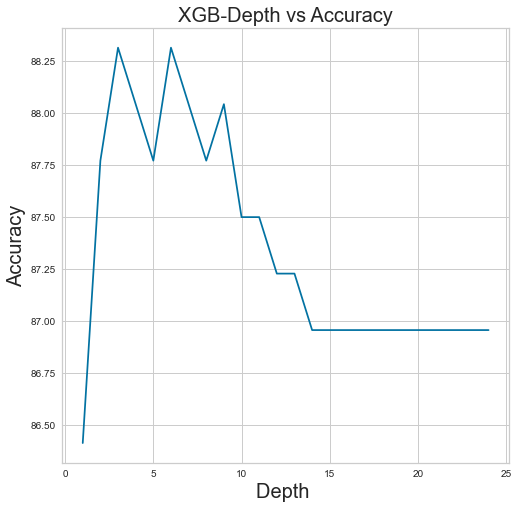

In [88]:
gx = []
gy = []
for i in range(1,25):
    gx.append(i)
    xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=i)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("XGB-Depth vs Accuracy",fontsize=20)
plt.xlabel("Depth ",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

Text(0, 0.5, 'Accuracy')

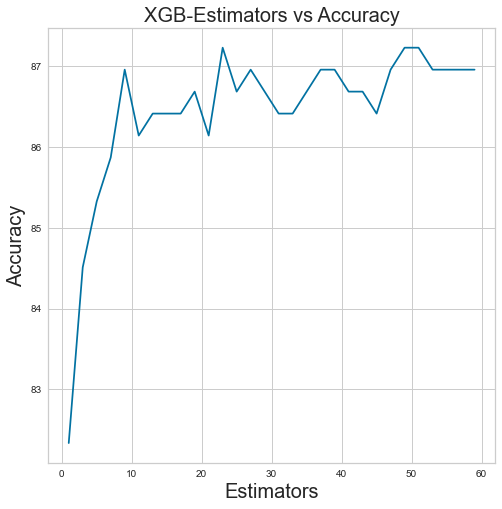

In [89]:
gx = []
gy = []
for i in range(1,60,2):
    gx.append(i)
    xb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=i, max_depth=15)
    xb.fit(X_train,y_train)
    gy.append(100*xb.score(X_test,y_test))
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("XGB-Estimators vs Accuracy",fontsize=20)
plt.xlabel("Estimators",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

In [90]:
gclf.best_estimator_.fit(X_train,y_train)
pred = gclf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       312
           1       0.88      0.39      0.54        56

    accuracy                           0.90       368
   macro avg       0.89      0.69      0.74       368
weighted avg       0.90      0.90      0.88       368



In [91]:
xg =pd.DataFrame({"model":('XGB'),"pre":[0.87],"rec":[0.88],"f1":[0.87],"acc":0.88})

In [92]:
xg

,model,pre,rec,f1,acc
0,XGB,0.87,0.88,0.87,0.88


C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


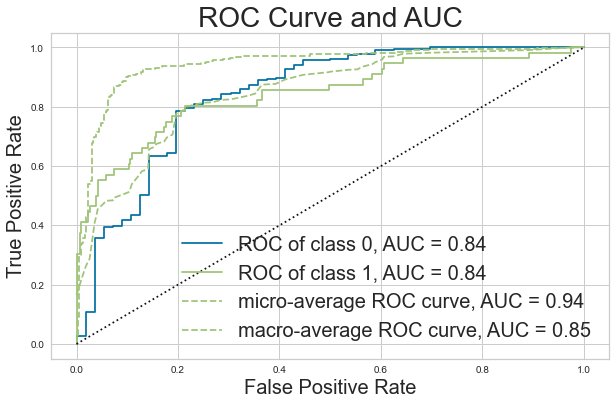

In [93]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(gclf.best_estimator_)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)
plt.legend(fontsize=20)


# Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier

In [78]:
aclf = AdaBoostClassifier()

In [110]:
param={'n_estimators':[x for x in range(2,50)],
      'algorithm':('SAMME', 'SAMME.R')       
      }
gclf = GridSearchCV(aclf, param_grid = param,scoring = 'f1_weighted')

Text(0, 0.5, 'Accuracy')

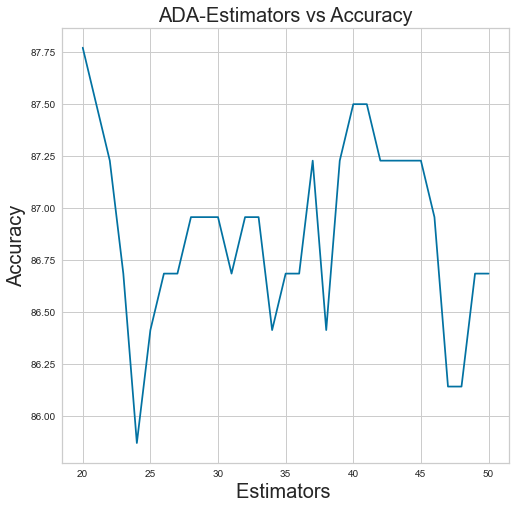

In [79]:
gx = []
gy = []
i=20
while i <= 50:
    gx.append(i)
    knn = AdaBoostClassifier(n_estimators=i, random_state=0)
    knn.fit(X_train,y_train)
    gy.append(100*knn.score(X_test,y_test))
    i=i+1
plt.figure(figsize=(8,8))  
plt.plot(gx,gy)
plt.title("ADA-Estimators vs Accuracy",fontsize=20)
plt.xlabel("Estimators ",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)


In [111]:
gclf.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]},
             scoring='f1_weighted')

In [112]:
gclf.best_estimator_

AdaBoostClassifier(n_estimators=47)

In [113]:
clf =AdaBoostClassifier(n_estimators=47)

In [114]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       319
           1       0.58      0.39      0.46        49

    accuracy                           0.88       368
   macro avg       0.74      0.67      0.70       368
weighted avg       0.87      0.88      0.87       368



In [115]:
ada =pd.DataFrame({"model":('Ada'),"pre":[0.84],"rec":[0.86],"f1":[0.84],"acc":0.86})

C:\Users\LOKSUNDAR\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


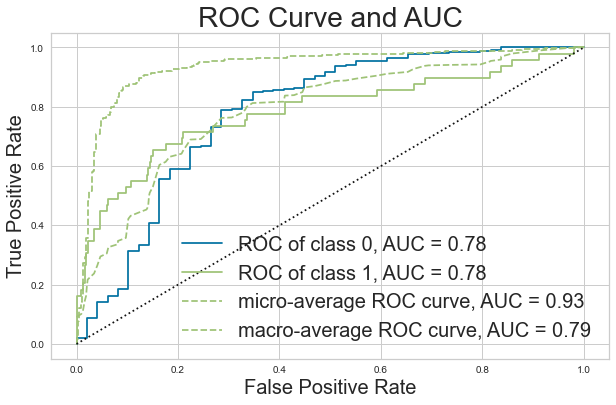

In [116]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve and AUC", fontsize=28)
plt.xlabel("False Positive Rate", fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
viz = ROCAUC(clf)

viz.fit(X_train,y_train)
viz.score(X_test,y_test)
plt.legend(fontsize=20)


In [117]:
data=pd.concat([dtmet,rf,kn,nn,ada,xg],ignore_index=True)
data

,model,pre,rec,f1,acc
0,DTree,0.82,0.85,0.82,0.85
1,RF,0.83,0.86,0.83,0.86
2,KNN,0.88,0.86,0.80,0.86
3,NN,0.83,0.85,0.84,0.85
4,Ada,0.84,0.86,0.84,0.86
5,XGB,0.87,0.88,0.87,0.88


In [118]:
import seaborn as sns 

In [119]:
data.set_index('model',inplace=True)

In [120]:
data

,pre,rec,f1,acc
model,,,,
DTree,0.82,0.85,0.82,0.85
RF,0.83,0.86,0.83,0.86
KNN,0.88,0.86,0.80,0.86
NN,0.83,0.85,0.84,0.85
Ada,0.84,0.86,0.84,0.86
XGB,0.87,0.88,0.87,0.88


In [158]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
#'weight' : 'bold',

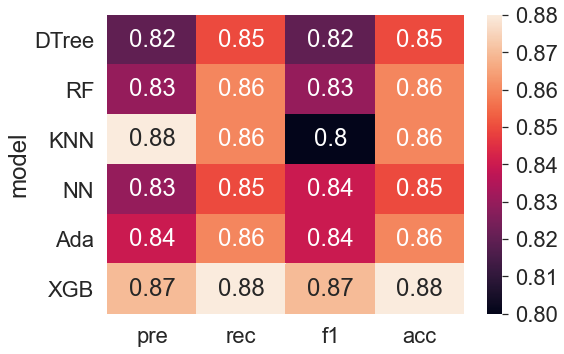

In [166]:
sns.heatmap(data,annot=True)
sns.set(font_scale = 1)
plt.show()

### Feature Importance 

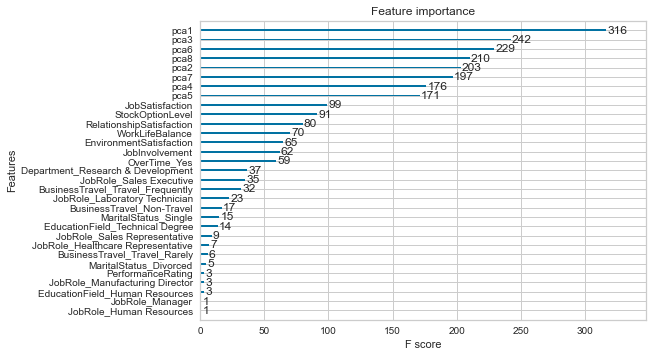

In [98]:
from xgboost import plot_importance
ax=plot_importance(xb)
ax.figure.savefig('XGB_Feature.png')